In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install numpy Pillow streamlit torch scipy open_clip_torch 

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.37.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-macosx_11_0_arm64.whl.metadata (4.9 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (2

In [1]:
import pandas as pd
import numpy as np

In [ ]:
images = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv')

In [ ]:
styles = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv',on_bad_lines='skip')

In [13]:
images.head(2)

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...


In [14]:
styles.head(2)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans


In [15]:
import json
with open('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles/10000.json', 'r') as f:
        data = json.load(f)

In [16]:
data

{'notification': {},
 'meta': {'code': 200, 'requestId': '71f19976-9607-4aa7-a1b9-2c9666f0e220'},
 'data': {'id': 10000,
  'price': 649,
  'discountedPrice': 324,
  'styleType': 'DEL',
  'productTypeId': 304,
  'articleNumber': '132197135028 1303',
  'visualTag': '',
  'productDisplayName': 'Palm Tree Girls Sp Jace Sko White Skirts',
  'variantName': 'SP JACE SKO',
  'myntraRating': 1,
  'catalogAddDate': 1418330925,
  'brandName': 'Palm Tree',
  'ageGroup': 'Kids-Girls',
  'gender': 'Women',
  'baseColour': 'White',
  'colour1': 'NA',
  'colour2': 'NA',
  'fashionType': 'Fashion',
  'season': 'Summer',
  'year': '2011',
  'usage': 'Casual',
  'vat': 5.5,
  'displayCategories': 'Bottomwear,Casual Wear and Clearance,Casual Wear,Sale',
  'weight': '0',
  'navigationId': 424,
  'landingPageUrl': 'Skirts/Palm-Tree/Palm-Tree-Girls-Sp-Jace-Sko-White-Skirts/10000/buy',
  'articleAttributes': {'Pattern': 'Printed',
   'Body or Garment Size': 'To-Fit Denotes Body Measurements in'},
  'crossLink

In [17]:
data['data']

{'id': 10000,
 'price': 649,
 'discountedPrice': 324,
 'styleType': 'DEL',
 'productTypeId': 304,
 'articleNumber': '132197135028 1303',
 'visualTag': '',
 'productDisplayName': 'Palm Tree Girls Sp Jace Sko White Skirts',
 'variantName': 'SP JACE SKO',
 'myntraRating': 1,
 'catalogAddDate': 1418330925,
 'brandName': 'Palm Tree',
 'ageGroup': 'Kids-Girls',
 'gender': 'Women',
 'baseColour': 'White',
 'colour1': 'NA',
 'colour2': 'NA',
 'fashionType': 'Fashion',
 'season': 'Summer',
 'year': '2011',
 'usage': 'Casual',
 'vat': 5.5,
 'displayCategories': 'Bottomwear,Casual Wear and Clearance,Casual Wear,Sale',
 'weight': '0',
 'navigationId': 424,
 'landingPageUrl': 'Skirts/Palm-Tree/Palm-Tree-Girls-Sp-Jace-Sko-White-Skirts/10000/buy',
 'articleAttributes': {'Pattern': 'Printed',
  'Body or Garment Size': 'To-Fit Denotes Body Measurements in'},
 'crossLinks': [{'key': 'More Skirts by Palm Tree',
   'value': 'skirts?f=brand:Palm Tree::gender:women'},
  {'key': 'More White Skirts', 'value':

In [18]:
import json
with open('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles/10002.json', 'r') as f:
        data = json.load(f)

In [19]:
data['data']

{'id': 10002,
 'price': 549,
 'discountedPrice': 274,
 'styleType': 'DEL',
 'productTypeId': 304,
 'articleNumber': '132215584945 8300',
 'visualTag': '',
 'productDisplayName': 'Palm Tree Kids Sp Jema Skt Blue Skirts',
 'variantName': 'SP JEMA SKT',
 'myntraRating': 1,
 'catalogAddDate': 1418330925,
 'brandName': 'Palm Tree',
 'ageGroup': 'Kids-Girls',
 'gender': 'Women',
 'baseColour': 'Blue',
 'colour1': 'NA',
 'colour2': 'NA',
 'fashionType': 'Fashion',
 'season': 'Summer',
 'year': '2011',
 'usage': 'Casual',
 'vat': 5.5,
 'displayCategories': 'Bottomwear,Casual Wear and Clearance,Casual Wear,Sale',
 'weight': '0',
 'navigationId': 0,
 'landingPageUrl': 'Skirts/Palm-Tree/Palm-Tree-Kids-Sp-Jema-Skt-Blue-Skirts/10002/buy',
 'articleAttributes': {'Pattern': 'Printed',
  'Body or Garment Size': 'To-Fit Denotes Body Measurements in'},
 'crossLinks': [{'key': 'More Skirts by Palm Tree',
   'value': 'skirts?f=brand:Palm Tree::gender:women'},
  {'key': 'More Blue Skirts', 'value': 'skirts

In [20]:
import os, json, math, re, glob
from datetime import datetime
from collections import Counter
from typing import Dict, Any, List, Optional

import pandas as pd

# ---------- helpers ----------
def safe_get(d: dict, path: str, default=None):
    cur = d
    for p in path.split("."):
        if isinstance(cur, dict) and p in cur:
            cur = cur[p]
        else:
            return default
    return cur

def flatten_dict(d: Dict[str, Any], prefix: str = "", sep: str = "_") -> Dict[str, Any]:
    out = {}
    for k, v in d.items():
        key = f"{prefix}{sep}{k}" if prefix else k
        if isinstance(v, dict):
            out.update(flatten_dict(v, key, sep))
        else:
            out[key] = v
    return out

def unix_to_date(ts: Optional[int]) -> Optional[str]:
    try:
        # many Myntra dumps are seconds; if ms was used, divide
        if ts and ts > 10_000_000_000: 
            ts = ts / 1000.0
        return datetime.utcfromtimestamp(ts).strftime("%Y-%m-%d")
    except Exception:
        return None

In [21]:
def parse_single_json(fp: str) -> Optional[Dict[str, Any]]:
    try:
        with open(fp, "r", encoding="utf-8") as f:
            obj = json.load(f)
            
        data = obj.get("data", {})
        if not isinstance(data, dict) or not data:
            return None

        row = {}

        # 1) simple scalar fields
        for k in [
            "id","price","discountedPrice","styleType","productTypeId","articleNumber",
            "productDisplayName","variantName","myntraRating","catalogAddDate",
            "brandName","ageGroup","gender","baseColour","colour1","colour2",
            "fashionType","season","year","usage","vat","displayCategories",
            "weight","navigationId","landingPageUrl","isEMIEnabled"
        ]:
            row[k] = data.get(k, None)

        # 2) nested dict picks
        row["masterCategory"] = safe_get(data, "masterCategory.typeName")
        row["subCategory"]    = safe_get(data, "subCategory.typeName")
        row["articleType"]    = safe_get(data, "articleType.typeName")

        # 3) discount info
        disc = data.get("discountData", {}) or {}
        row["discount_percent"] = disc.get("discountPercent")
        row["discount_amount"]  = disc.get("discountAmount")
        row["effective_price"]  = data.get("discountedPrice") if data.get("discountedPrice") else data.get("price")

        # 4) timestamp → date
        row["catalogAddDate_utc"] = unix_to_date(data.get("catalogAddDate"))

        # 5) article attributes (flatten a tiny dict)
        article_attrs = data.get("articleAttributes", {}) or {}
        for ak, av in article_attrs.items():
            col = f"articleAttr_{re.sub('[^A-Za-z0-9_]+','_', ak).strip('_')}"
            row[col] = av

        # 6) otherFlags → convert booleans
        flags = data.get("otherFlags", []) or []
        # example result: {'isReturnable': 'true', ...}
        flag_map = { f.get("name"): f.get("value") for f in flags if isinstance(f, dict) }
        def parse_bool(s):
            if isinstance(s, bool): return s
            if isinstance(s, str): return s.lower() == "true"
            return None
        for flag_name in ["isFragile","isTryAndBuyEnabled","isHazmat","isJewellery",
                          "isReturnable","isExchangeable","active","socialSharingEnabled",
                          "pickupEnabled","isLarge","codEnabled"]:
            row[flag_name] = parse_bool(flag_map.get(flag_name))

        # 7) sizes & inventory (styleOptions is a list of variants)
        style_opts = data.get("styleOptions", []) or []
        row["num_style_options"] = len(style_opts)
        available_counts = []
        any_available = False
        for opt in style_opts:
            inv = opt.get("inventoryCount", 0) or 0
            available_counts.append(inv)
            if opt.get("available") is True or (isinstance(inv, (int,float)) and inv > 0):
                any_available = True
        row["any_in_stock"] = any_available
        row["total_inventoryCount"] = int(sum(c for c in available_counts if isinstance(c, (int,float))))

        # 8) image availability + a canonical image url
        style_images = data.get("styleImages", {}) or {}
        default_img = safe_get(style_images, "default.imageURL")
        front_img   = safe_get(style_images, "front.imageURL")
        back_img    = safe_get(style_images, "back.imageURL")
        row["image_url"] = default_img or front_img or back_img
        row["has_image"] = bool(row["image_url"])

        # 9) crossLinks (list of dicts) → simple tags
        cross = data.get("crossLinks", []) or []
        row["num_crosslinks"] = len(cross)
        # optionally join keys for quick text features
        row["crosslink_keys_joined"] = " | ".join([c.get("key","") for c in cross if isinstance(c, dict)])

        # 10) product description (html) → plain text
        desc_html = safe_get(data, "productDescriptors.description.value") or ""
        row["description_text"] = re.sub("<[^<]+?>", " ", desc_html).strip()

        return row
    except Exception:
        # swallow malformed files
        return None


In [22]:
df = parse_single_json('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles/10002.json')

In [23]:
df

{'id': 10002,
 'price': 549,
 'discountedPrice': 274,
 'styleType': 'DEL',
 'productTypeId': 304,
 'articleNumber': '132215584945 8300',
 'productDisplayName': 'Palm Tree Kids Sp Jema Skt Blue Skirts',
 'variantName': 'SP JEMA SKT',
 'myntraRating': 1,
 'catalogAddDate': 1418330925,
 'brandName': 'Palm Tree',
 'ageGroup': 'Kids-Girls',
 'gender': 'Women',
 'baseColour': 'Blue',
 'colour1': 'NA',
 'colour2': 'NA',
 'fashionType': 'Fashion',
 'season': 'Summer',
 'year': '2011',
 'usage': 'Casual',
 'vat': 5.5,
 'displayCategories': 'Bottomwear,Casual Wear and Clearance,Casual Wear,Sale',
 'weight': '0',
 'navigationId': 0,
 'landingPageUrl': 'Skirts/Palm-Tree/Palm-Tree-Kids-Sp-Jema-Skt-Blue-Skirts/10002/buy',
 'isEMIEnabled': True,
 'masterCategory': 'Apparel',
 'subCategory': 'Bottomwear',
 'articleType': 'Skirts',
 'discount_percent': 50,
 'discount_amount': 275,
 'effective_price': 274,
 'catalogAddDate_utc': '2014-12-11',
 'articleAttr_Pattern': 'Printed',
 'articleAttr_Body_or_Garm

In [43]:
def parse_folder(
    input_dir: str,
    out_jsonl: Optional[str] = None,
    out_csv: Optional[str] = None,
    sample: Optional[int] = None
) -> pd.DataFrame:
    files = sorted(glob.glob(f'{input_dir}/*.json'))
    if sample:
        files = files[:sample]

    rows: List[Dict[str, Any]] = []
    from tqdm import tqdm
    for fp in tqdm(files, total=len(files), desc="Parsing JSON"):
        row = parse_single_json(fp)  # <- your existing parser
        if row:
            rows.append(row)

    df = pd.DataFrame(rows)

    # basic dtype cleanup
    num_cols = [
        "price","discountedPrice","myntraRating","vat",
        "discount_percent","discount_amount","effective_price",
        "total_inventoryCount","navigationId"
    ]
    for c in num_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    # useful derived bits
    if "displayCategories" in df.columns:
        df["displayCat_primary"] = (
            df["displayCategories"].fillna("")
            .str.split(",").str[0].str.strip()
            .replace({"": None})
        )

    # saves (no parquet)
    if out_csv:
        df.to_csv(out_csv, index=False)

    if out_jsonl:

        df.to_json(out_jsonl, orient="records", lines=True, force_ascii=False)

    return df


In [44]:
from collections import Counter
from typing import Dict, Any, List, Optional

In [57]:
df = parse_folder('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles/')

Parsing JSON: 100%|██████████| 44446/44446 [01:13<00:00, 603.45it/s]


In [58]:
df.shape

(44446, 251)

In [59]:
print("Total rows:", len(df))
print("Unique ids:", df["id"].nunique())

dup_counts = df["id"].value_counts()
print(dup_counts.head(10))
print("How many ids appear more than once:", (dup_counts > 1).sum())

Total rows: 44446
Unique ids: 44446
id
10000    1
45976    1
45964    1
45965    1
45968    1
45969    1
4597     1
45970    1
45972    1
45973    1
Name: count, dtype: int64
How many ids appear more than once: 0


In [60]:
df.head()

,id,price,discountedPrice,styleType,productTypeId,articleNumber,productDisplayName,variantName,myntraRating,catalogAddDate,...,articleAttr_Volume,articleAttr_Design,articleAttr_Formulation,articleAttr_Skin_Type,articleAttr_Skin_Tone,articleAttr_Colour_Hex_Code,articleAttr_Concern,articleAttr_SPF,articleAttr_Number_of_Contents,displayCat_primary
0,10000,649.0,324.0,DEL,304,132197135028 1303,Palm Tree Girls Sp Jace Sko White Skirts,SP JACE SKO,1,1418330925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bottomwear
1,10001,549.0,274.0,DEL,304,132215584945 6300,Palm Tree Kids Girls Sp Jema Skt Blue Skirts,SP JEMA SKT,1,1418330925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bottomwear
2,10002,549.0,274.0,DEL,304,132215584945 8300,Palm Tree Kids Sp Jema Skt Blue Skirts,SP JEMA SKT,1,1418330925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bottomwear
3,10003,2695.0,2695.0,P,289,376668-100,Nike Women As Nike Eleme White T-Shirt,AS NIKE ELEME,1,1461658417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tshirts
4,10004,1995.0,1995.0,P,303,393799-064,Nike Men As 7 Sw Temp Grey Shorts,AS 7 SW TEMP,1,1461658417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Wear


In [61]:
df['id'].value_counts()

id
10000    1
45976    1
45964    1
45965    1
45968    1
        ..
27340    1
27341    1
27342    1
27343    1
9999     1
Name: count, Length: 44446, dtype: int64

In [62]:
df.T[0]

id                                     10000
price                                  649.0
discountedPrice                        324.0
styleType                                DEL
productTypeId                            304
                                     ...    
articleAttr_Colour_Hex_Code              NaN
articleAttr_Concern                      NaN
articleAttr_SPF                          NaN
articleAttr_Number_of_Contents           NaN
displayCat_primary                Bottomwear
Name: 0, Length: 251, dtype: object

In [63]:
l = list(df.columns)

In [64]:
l

['id',
 'price',
 'discountedPrice',
 'styleType',
 'productTypeId',
 'articleNumber',
 'productDisplayName',
 'variantName',
 'myntraRating',
 'catalogAddDate',
 'brandName',
 'ageGroup',
 'gender',
 'baseColour',
 'colour1',
 'colour2',
 'fashionType',
 'season',
 'year',
 'usage',
 'vat',
 'displayCategories',
 'weight',
 'navigationId',
 'landingPageUrl',
 'isEMIEnabled',
 'masterCategory',
 'subCategory',
 'articleType',
 'discount_percent',
 'discount_amount',
 'effective_price',
 'catalogAddDate_utc',
 'articleAttr_Pattern',
 'articleAttr_Body_or_Garment_Size',
 'isFragile',
 'isTryAndBuyEnabled',
 'isHazmat',
 'isJewellery',
 'isReturnable',
 'isExchangeable',
 'active',
 'socialSharingEnabled',
 'pickupEnabled',
 'isLarge',
 'codEnabled',
 'num_style_options',
 'any_in_stock',
 'total_inventoryCount',
 'image_url',
 'has_image',
 'num_crosslinks',
 'crosslink_keys_joined',
 'description_text',
 'articleAttr_Fit',
 'articleAttr_Sleeve_Length',
 'articleAttr_Neck',
 'articleAttr

In [69]:
null_ratio = df.isna().mean()     # gives fraction of nulls per column
cols_80_null = null_ratio[null_ratio > 0.80].index.tolist()

print("Columns with >80% null values:")
print(cols_80_null)

Columns with >80% null values:
['articleAttr_Fabric_2', 'articleAttr_Shape', 'articleAttr_Length', 'articleAttr_Collar', 'articleAttr_Fabric_3', 'articleAttr_Sport', 'articleAttr_Business_Unit', 'articleAttr_Sleeve_Styling', 'articleAttr_Multipack_Set', 'articleAttr_Main_Trend', 'articleAttr_Print_or_Pattern_Type', 'articleAttr_Number_of_Components', 'articleAttr_Sport_Team', 'articleAttr_Segment', 'articleAttr_Technology', 'articleAttr_Players', 'articleAttr_Character', 'articleAttr_Wash_Care', 'articleAttr_Number_of_Pockets', 'articleAttr_Surface_Styling', 'articleAttr_Brick', 'articleAttr_Family', 'articleAttr_Class', 'articleAttr_Pattern_Coverage', 'articleAttr_Processing_Time', 'articleAttr_Display', 'articleAttr_Water_Resistance', 'articleAttr_Fastening', 'articleAttr_Material', 'articleAttr_Strap_Material', 'articleAttr_Movement', 'articleAttr_Dial_Shape', 'articleAttr_Power_Source', 'articleAttr_Make', 'articleAttr_Size', 'articleAttr_Compartment_Closure', 'articleAttr_Toe_Shap

In [70]:
df_1 = df.drop(columns=cols_80_null)

In [71]:
df_1.T[0]

id                           10000
price                        649.0
discountedPrice              324.0
styleType                      DEL
productTypeId                  304
                           ...    
articleAttr_Neck               NaN
articleAttr_Fabric             NaN
articleAttr_Occasion           NaN
articleAttr_Type               NaN
displayCat_primary      Bottomwear
Name: 0, Length: 61, dtype: object

In [72]:
df_1.head()

,id,price,discountedPrice,styleType,productTypeId,articleNumber,productDisplayName,variantName,myntraRating,catalogAddDate,...,num_crosslinks,crosslink_keys_joined,description_text,articleAttr_Fit,articleAttr_Sleeve_Length,articleAttr_Neck,articleAttr_Fabric,articleAttr_Occasion,articleAttr_Type,displayCat_primary
0,10000,649.0,324.0,DEL,304,132197135028 1303,Palm Tree Girls Sp Jace Sko White Skirts,SP JACE SKO,1,1418330925,...,3,More Skirts by Palm Tree | More White Skirts |...,Wash Care Machine Wash separately in cold w...,NaN,NaN,NaN,NaN,NaN,NaN,Bottomwear
1,10001,549.0,274.0,DEL,304,132215584945 6300,Palm Tree Kids Girls Sp Jema Skt Blue Skirts,SP JEMA SKT,1,1418330925,...,3,More Skirts by Palm Tree | More Blue Skirts | ...,Wash Care Machine Wash separately in cold w...,NaN,NaN,NaN,NaN,NaN,NaN,Bottomwear
2,10002,549.0,274.0,DEL,304,132215584945 8300,Palm Tree Kids Sp Jema Skt Blue Skirts,SP JEMA SKT,1,1418330925,...,3,More Skirts by Palm Tree | More Blue Skirts | ...,Wash Care Machine Wash separately in cold w...,NaN,NaN,NaN,NaN,NaN,NaN,Bottomwear
3,10003,2695.0,2695.0,P,289,376668-100,Nike Women As Nike Eleme White T-Shirt,AS NIKE ELEME,1,1461658417,...,3,More Tshirts by Nike | More White Tshirts | Mo...,Composition White high collared t-shirt made...,NaN,NaN,NaN,NaN,NaN,NaN,Tshirts
4,10004,1995.0,1995.0,P,303,393799-064,Nike Men As 7 Sw Temp Grey Shorts,AS 7 SW TEMP,1,1461658417,...,3,More Shorts by Nike | More Grey Shorts | More ...,Composition Grey&nbsp; shorts made of 86% po...,NaN,NaN,NaN,NaN,NaN,NaN,Sports Wear


In [73]:
df_1.to_csv('Final_Styles.csv',index=False)

In [74]:
df = pd.read_csv('/kaggle/input/combined/Final_Styles.csv')

In [75]:
df.head()

,id,price,discountedPrice,styleType,productTypeId,articleNumber,productDisplayName,variantName,myntraRating,catalogAddDate,...,description_text,articleAttr_Fit,articleAttr_Sleeve_Length,articleAttr_Neck,articleAttr_Fabric,articleAttr_Occasion,articleAttr_Fabric_2,articleAttr_Type,articleAttr_Material,displayCat_primary
0,10000,649.0,324.0,DEL,304,132197135028 1303,Palm Tree Girls Sp Jace Sko White Skirts,SP JACE SKO,1,1418330925,...,Wash Care Machine Wash separately in cold w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bottomwear
1,10001,549.0,274.0,DEL,304,132215584945 6300,Palm Tree Kids Girls Sp Jema Skt Blue Skirts,SP JEMA SKT,1,1418330925,...,Wash Care Machine Wash separately in cold w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bottomwear
2,10002,549.0,274.0,DEL,304,132215584945 8300,Palm Tree Kids Sp Jema Skt Blue Skirts,SP JEMA SKT,1,1418330925,...,Wash Care Machine Wash separately in cold w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bottomwear
3,10003,2695.0,2695.0,P,289,376668-100,Nike Women As Nike Eleme White T-Shirt,AS NIKE ELEME,1,1461658417,...,Composition White high collared t-shirt made...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tshirts
4,10004,1995.0,1995.0,P,303,393799-064,Nike Men As 7 Sw Temp Grey Shorts,AS 7 SW TEMP,1,1461658417,...,Composition Grey&nbsp; shorts made of 86% po...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Wear


In [3]:
!pip install open_clip_torch

In [4]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

import torch
import open_clip  # pip install open_clip_torch

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [5]:
STYLES_CSV = "/kaggle/input/combined/Styles_Corrected_One.csv"
IMAGES_DIR = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images"
OUTPUT_EMB_NPY = "image_embeddings_clip.npy"
OUTPUT_IDS_CSV = "image_embeddings_ids.csv"
MODEL_NAME = "ViT-B-32"
PRETRAINED = "laion2b_s34b_b79k"

In [6]:
df = pd.read_csv(STYLES_CSV)

# If your style ID column is named differently, change this:
ID_COL = "id"

# Map id -> image path; adjust if your filenames are like "<id>_1.jpg" etc.
def id_to_path(style_id):
    return os.path.join(IMAGES_DIR, f"{style_id}.jpg")

In [7]:
df.shape

(44446, 61)

In [8]:
df["image_path"] = df[ID_COL].apply(id_to_path)

print("Number of styles:", len(df))
print(df[[ID_COL, "image_path"]].head())

Number of styles: 44446
      id                                         image_path
0  10000  /kaggle/input/fashion-product-images-dataset/f...
1  10001  /kaggle/input/fashion-product-images-dataset/f...
2  10002  /kaggle/input/fashion-product-images-dataset/f...
3  10003  /kaggle/input/fashion-product-images-dataset/f...
4  10004  /kaggle/input/fashion-product-images-dataset/f...


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [10]:
model, _, preprocess = open_clip.create_model_and_transforms(
    MODEL_NAME,
    pretrained=PRETRAINED
)
model.eval()
model.to(device)

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine

In [11]:
def extract_clip_feature(img_path: str):
    if not os.path.exists(img_path):
        return None
    try:
        img = Image.open(img_path).convert("RGB")
    except Exception:
        return None

    # preprocess returns a tensor ready for CLIP
    x = preprocess(img).unsqueeze(0).to(device)  # [1, 3, H, W]

    with torch.no_grad():
        feat = model.encode_image(x)     # [1, 512] for ViT-B/32
        # Normalize to unit length (cosine similarity-friendly)
        feat = feat / feat.norm(dim=-1, keepdim=True)
        feat = feat.squeeze(0).cpu().numpy()   # [512]

    return feat

In [12]:
emb_dim = 512  # for CLIP ViT-B/32
all_embs = np.zeros((len(df), emb_dim), dtype="float32")
has_emb = np.zeros(len(df), dtype=bool)

In [13]:
for i, path in tqdm(enumerate(df["image_path"]), total=len(df), desc="Extracting CLIP image features"):
    emb = extract_clip_feature(path)
    if emb is not None:
        all_embs[i] = emb
        has_emb[i] = True
    else:
        # leave zeros; mark as missing
        has_emb[i] = False

Extracting CLIP image features: 100%|██████████| 44446/44446 [45:06<00:00, 16.42it/s]  


In [ ]:
print("Embeddings extracted for", has_emb.sum(), "out of", len(df), "items") 

In [14]:
ids = df[ID_COL].values

# 5) Save embeddings + ids
np.save(OUTPUT_EMB_NPY, all_embs)
pd.DataFrame({ID_COL: ids}).to_csv(OUTPUT_IDS_CSV, index=False)

print("Saved embeddings to:", OUTPUT_EMB_NPY)
print("Saved ids to:", OUTPUT_IDS_CSV)

Saved embeddings to: image_embeddings_clip.npy
Saved ids to: image_embeddings_ids.csv


In [2]:
import numpy as np
import pandas as pd

# Load files
img_embs = np.load("/kaggle/input/combined/image_embeddings_clip.npy")
ids = pd.read_csv("/kaggle/input/combined/image_embeddings_ids.csv")

print("Embeddings shape:", img_embs.shape)     # (44446, 512) ideally
print("IDs shape:", ids.shape)                 # (44446, 1) ideally

print("\nFirst 5 IDs:")
print(ids.head())

print("\nFirst 10 values of 1st embedding:")
print(img_embs[0][:10])

Embeddings shape: (44446, 512)
IDs shape: (44446, 1)

First 5 IDs:
      id
0  10000
1  10001
2  10002
3  10003
4  10004

First 10 values of 1st embedding:
[-0.00659671 -0.04824097 -0.02536648  0.04901672 -0.01047427 -0.04954801
 -0.0297591   0.00828023 -0.02053916  0.00281422]


In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# Choose first product
query_vec = img_embs[0].reshape(1, -1)

# Compute similarity with all
sims = cosine_similarity(query_vec, img_embs).ravel()

# Get top 6 (1st one is itself)
top_idx = sims.argsort()[-6:][::-1]

print("Most similar products for ID:", ids.iloc[0].values[0])
for i in top_idx:
    print("ID:", ids.iloc[i].values[0], "Similarity:", round(sims[i], 3))

Most similar products for ID: 10000
ID: 10000 Similarity: 1.0
ID: 11260 Similarity: 0.818
ID: 31461 Similarity: 0.784
ID: 13293 Similarity: 0.772
ID: 5005 Similarity: 0.763
ID: 5575 Similarity: 0.756


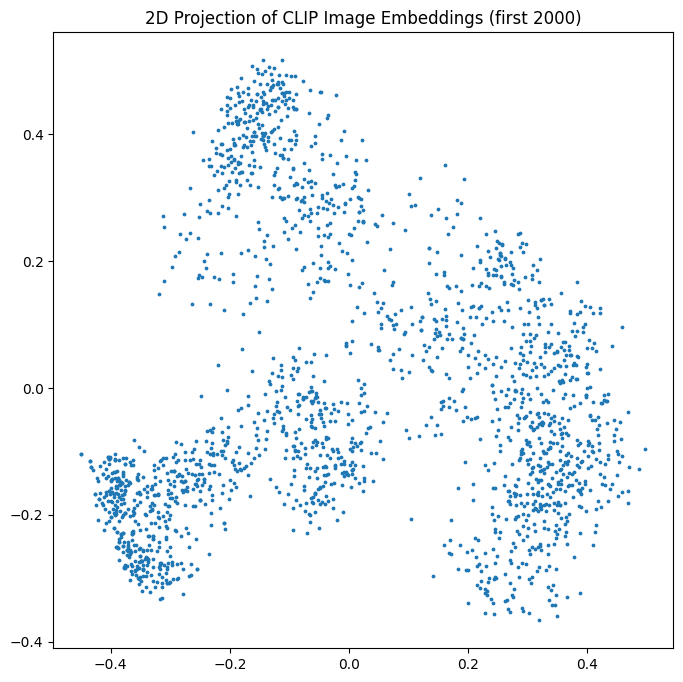

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
emb_2d = pca.fit_transform(img_embs[:2000])   # plot first 2000 for speed

plt.figure(figsize=(8,8))
plt.scatter(emb_2d[:,0], emb_2d[:,1], s=3)
plt.title("2D Projection of CLIP Image Embeddings (first 2000)")
plt.show()

## Cleaning Data

In [48]:
df = pd.read_csv("/kaggle/input/combined/Styles_Corrected_One.csv")

print("Shape:", df.shape)

Shape: (44446, 61)


In [49]:
null_percent = df.isna().mean().sort_values(ascending=False) * 100
null_percent.head(30)

colour2                             95.016424
articleAttr_Neck                    78.981236
articleAttr_Fit                     77.307294
articleAttr_Type                    77.219547
discount_amount                     77.194798
discount_percent                    77.194798
articleAttr_Occasion                75.246366
colour1                             73.349683
articleAttr_Sleeve_Length           71.120011
articleAttr_Fabric                  64.919228
articleAttr_Pattern                 62.871799
articleAttr_Body_or_Garment_Size    57.172749
displayCategories                   13.031544
displayCat_primary                  13.031544
usage                                0.713225
description_text                     0.629978
season                               0.047248
baseColour                           0.033749
productDisplayName                   0.015749
variantName                          0.015749
image_url                            0.009000
fashionType                       

In [50]:
cols_90_null = null_percent[null_percent > 90].index.tolist()
cols_50_null = null_percent[(null_percent > 50) & (null_percent <= 90)].index.tolist()

print("Columns > 90% null:", len(cols_90_null))
print("Columns 50-90% null:", len(cols_50_null))

Columns > 90% null: 1
Columns 50-90% null: 11


In [51]:
df = df.drop(columns=cols_90_null)

In [52]:
df.shape

(44446, 60)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                44446 non-null  int64  
 1   price                             44446 non-null  float64
 2   discountedPrice                   44446 non-null  float64
 3   styleType                         44446 non-null  object 
 4   productTypeId                     44446 non-null  int64  
 5   articleNumber                     44446 non-null  object 
 6   productDisplayName                44439 non-null  object 
 7   variantName                       44439 non-null  object 
 8   myntraRating                      44446 non-null  int64  
 9   catalogAddDate                    44446 non-null  int64  
 10  brandName                         44446 non-null  object 
 11  ageGroup                          44445 non-null  object 
 12  gend

In [54]:
cat_cols = df.select_dtypes(include="object").columns

df[cat_cols] = df[cat_cols].fillna("Unknown")

In [55]:
null_percent = df.isna().mean().sort_values(ascending=False) * 100
null_percent.head(30)

discount_amount              77.194798
discount_percent             77.194798
year                          0.002250
id                            0.000000
codEnabled                    0.000000
isFragile                     0.000000
isTryAndBuyEnabled            0.000000
isHazmat                      0.000000
isJewellery                   0.000000
isReturnable                  0.000000
isExchangeable                0.000000
active                        0.000000
socialSharingEnabled          0.000000
pickupEnabled                 0.000000
isLarge                       0.000000
num_style_options             0.000000
articleAttr_Pattern           0.000000
any_in_stock                  0.000000
total_inventoryCount          0.000000
image_url                     0.000000
has_image                     0.000000
num_crosslinks                0.000000
crosslink_keys_joined         0.000000
description_text              0.000000
articleAttr_Fit               0.000000
articleAttr_Sleeve_Length

In [56]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [57]:
df.isna().sum().sum()

0

In [58]:
to_drop = [
    "articleNumber",
    "landingPageUrl",
    "navigationId",
    "crosslink_keys_joined"
]

df = df.drop(columns=[c for c in to_drop if c in df.columns])

In [59]:
df.shape

(44446, 56)

In [60]:
df["baseColour"] = df["baseColour"].str.lower()
df["gender"] = df["gender"].str.lower()
df["season"] = df["season"].str.lower()
df["usage"] = df["usage"].str.lower()

In [61]:
df["price"].describe()

count    44446.000000
mean      1690.563134
std       1715.875585
min          0.000000
25%        649.000000
50%       1199.000000
75%       1999.000000
max      28950.000000
Name: price, dtype: float64

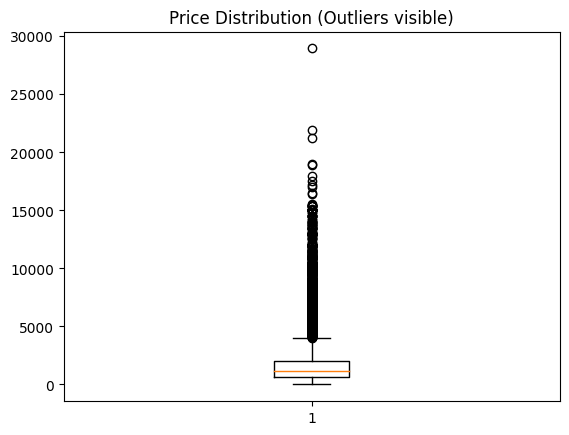

In [62]:
import matplotlib.pyplot as plt

plt.boxplot(df["price"])  
plt.title("Price Distribution (Outliers visible)")
plt.show()

In [63]:
upper = df["price"].quantile(0.99)
lower = df["price"].quantile(0.01)

df = df[(df["price"] <= upper) & (df["price"] >= lower)]

print("After price outlier removal:", df.shape)

After price outlier removal: (43575, 56)


In [64]:
print("Duplicates:", df.duplicated(subset=["id"]).sum())

df = df.drop_duplicates(subset=["id"])

Duplicates: 0


In [65]:
num_df = df.select_dtypes(include=["int64", "float64"])
print(num_df.columns)

Index(['id', 'price', 'discountedPrice', 'productTypeId', 'myntraRating',
       'catalogAddDate', 'year', 'vat', 'weight', 'discount_percent',
       'discount_amount', 'effective_price', 'num_style_options',
       'total_inventoryCount', 'num_crosslinks'],
      dtype='object')


In [66]:
corr_matrix = num_df.corr().abs()

# Visual check (top few rows)
corr_matrix.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,price,discountedPrice,productTypeId,myntraRating,catalogAddDate,year,vat,weight,discount_percent,discount_amount,effective_price,num_style_options,total_inventoryCount,num_crosslinks
id,1.000000,0.055433,0.057344,0.285490,0.212040,0.056222,0.414183,0.126929,0.006833,0.038003,0.031634,0.057344,0.244080,0.005619,NaN
price,0.055433,1.000000,0.984079,0.013927,0.034603,0.215953,0.051996,0.337055,0.005992,0.049480,0.173148,0.984079,0.043195,0.006859,NaN
discountedPrice,0.057344,0.984079,1.000000,0.022637,0.027125,0.210467,0.042432,0.328112,0.005676,0.163945,0.002071,1.000000,0.033499,0.006660,NaN
productTypeId,0.285490,0.013927,0.022637,1.000000,0.175801,0.086305,0.464523,0.232039,0.001304,0.045606,0.020528,0.022637,0.292289,0.001090,NaN
myntraRating,0.212040,0.034603,0.027125,0.175801,1.000000,0.073000,0.270743,0.143297,0.000600,0.026764,0.030470,0.027125,0.098777,0.001449,NaN


In [67]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# columns with correlation > 0.9
high_corr_cols = [
    col for col in upper_tri.columns if any(upper_tri[col] > 0.90)
]

print("Highly correlated columns:", high_corr_cols)

Highly correlated columns: ['discountedPrice', 'effective_price']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [68]:
df = df.drop(columns=["discountedPrice"])

In [69]:
df.shape

(43575, 55)

In [70]:
from sklearn.feature_selection import VarianceThreshold

num_df = df.select_dtypes(include=["int64","float64"])

selector = VarianceThreshold(threshold=0.01)  # 1% variation minimum
selector.fit(num_df)

low_var_cols = num_df.columns[~selector.get_support()]

print("Low variance columns (to remove):", list(low_var_cols))

Low variance columns (to remove): ['num_crosslinks']


In [71]:
df = df.drop(columns=low_var_cols)
print("After removing low-variance cols:", df.shape)

After removing low-variance cols: (43575, 54)


In [72]:
cat_cols = df.select_dtypes(include="object").columns

high_cardinality = [col for col in cat_cols if df[col].nunique() > 0.5 * len(df)]

print("High-cardinality columns:", high_cardinality)

High-cardinality columns: ['productDisplayName', 'image_url', 'description_text']


In [73]:
df = df.drop(columns=high_cardinality)

print("Shape after removing high-cardinality cols:", df.shape)

Shape after removing high-cardinality cols: (43575, 51)


In [74]:
def add_domain_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # ---- price-based features ----
    if {"price", "effective_price"}.issubset(df.columns):
        df["discount_amount"] = (df["price"] - df["effective_price"]).clip(lower=0)

        # avoid division by zero
        df["discount_ratio"] = np.where(
            df["price"] > 0,
            df["discount_amount"] / df["price"],
            0.0
        )
        df["is_discounted"] = (df["discount_ratio"] > 0.01).astype(int)

        # log transforms to reduce skew
        df["log_price"] = np.log1p(df["price"])
        df["log_effective_price"] = np.log1p(df["effective_price"])
    else:
        print("[WARN] price/effective_price not found; skipping price features.")

    # ---- price segments (cheap / mid / premium) ----
    if "effective_price" in df.columns:
        q1 = df["effective_price"].quantile(0.33)
        q2 = df["effective_price"].quantile(0.66)
        def price_bucket(x):
            if x <= q1:  return "low"
            elif x <= q2: return "mid"
            else:         return "high"
        df["price_bucket"] = df["effective_price"].apply(price_bucket)

    # ---- year as numeric ----
    if "year" in df.columns:
        df["year"] = pd.to_numeric(df["year"], errors="coerce")
        # you can also bucket years into eras if you want:
        df["era"] = pd.cut(
            df["year"],
            bins=[2005, 2010, 2015, 2020, 2025],
            labels=["2006-2010", "2011-2015", "2016-2020", "2021-2025"]
        )

    # ---- colour normalization ----
    if "baseColour" in df.columns:
        df["baseColour"] = df["baseColour"].str.lower().str.strip()
        colour_map = {
            "off white": "white",
            "cream": "white",
            "light blue": "blue",
            "dark blue": "navy",
            "navy blue": "navy",
            "grey": "gray",
            "charcoal": "gray",
            "burgundy": "red",
        }
        df["baseColour"] = df["baseColour"].replace(colour_map)

    # ---- season buckets (hot/cold/all-year) ----
    if "season" in df.columns:
        df["season"] = df["season"].str.lower().str.strip()
        def season_bucket(s):
            if s in ["spring", "summer"]: return "warm"
            if s in ["fall", "winter", "autumn"]: return "cold"
            return "all_year"
        df["season_bucket"] = df["season"].apply(season_bucket)

    # ---- gender-age grouping ----
    if {"gender", "ageGroup"}.issubset(df.columns):
        df["gender"] = df["gender"].str.lower()
        df["ageGroup"] = df["ageGroup"].astype(str).str.lower()
        df["segment"] = (
            df["gender"].str.replace("-","_") + "_" +
            df["ageGroup"].str.replace("-","_")
        )

    # ---- short text meta features ----
    text_cols = [c for c in ["productDisplayName", "description_text"] if c in df.columns]
    if text_cols:
        df["combined_text"] = df[text_cols].fillna("").agg(" ".join, axis=1)
        df["name_len_chars"] = df["productDisplayName"].fillna("").str.len()
        df["name_word_count"] = df["productDisplayName"].fillna("").str.split().str.len()

    return df


In [75]:
df_fe = add_domain_features(df)
print("After domain features:", df_fe.shape)
df_fe.head()

After domain features: (43575, 59)


,id,price,styleType,productTypeId,variantName,myntraRating,catalogAddDate,brandName,ageGroup,gender,...,articleAttr_Type,displayCat_primary,discount_ratio,is_discounted,log_price,log_effective_price,price_bucket,era,season_bucket,segment
0,10000,649.0,DEL,304,SP JACE SKO,1,1418330925,Palm Tree,kids-girls,women,...,Unknown,Bottomwear,0.500770,1,6.476972,5.783825,low,2011-2015,warm,women_kids_girls
1,10001,549.0,DEL,304,SP JEMA SKT,1,1418330925,Palm Tree,kids-girls,women,...,Unknown,Bottomwear,0.500911,1,6.309918,5.616771,low,2011-2015,warm,women_kids_girls
2,10002,549.0,DEL,304,SP JEMA SKT,1,1418330925,Palm Tree,kids-girls,women,...,Unknown,Bottomwear,0.500911,1,6.309918,5.616771,low,2011-2015,warm,women_kids_girls
3,10003,2695.0,P,289,AS NIKE ELEME,1,1461658417,Nike,adults-women,women,...,Unknown,Tshirts,0.000000,0,7.899524,7.899524,high,2011-2015,cold,women_adults_women
4,10004,1995.0,P,303,AS 7 SW TEMP,1,1461658417,Nike,adults-men,men,...,Unknown,Sports Wear,0.000000,0,7.598900,7.598900,high,2011-2015,cold,men_adults_men


In [76]:
def drop_redundant_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    cols_to_drop = []

    # If we have stronger versions of these:
    if "discountedPrice" in df.columns:
        cols_to_drop.append("discountedPrice")
    # we might keep discount_amount OR ratio; here assume ratio is preferred
    # (comment this line out if you want both)
    if "discount_amount" in df.columns:
        cols_to_drop.append("discount_amount")

    # keep era instead of raw year if you prefer categorical
    # comment out if you still want year as numeric
    # if "year" in df.columns:
    #     cols_to_drop.append("year")

    # technical / id-like columns that don't help similarity
    for col in ["articleNumber", "weight", "displayCategories", "landingPageUrl", "navigationId"]:
        if col in df.columns:
            cols_to_drop.append(col)

    # if you created combined_text and plan to use TF-IDF directly on that,
    # you might not need individual description_text anymore:
    if "description_text" in df.columns:
        cols_to_drop.append("description_text")

    # deduplicate list & drop
    cols_to_drop = list(dict.fromkeys(cols_to_drop))
    print("Dropping columns:", cols_to_drop)

    df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
    return df


In [77]:
df_fe = drop_redundant_columns(df_fe)
print("Final feature-engineered df shape:", df_fe.shape)
df_fe.head()

Dropping columns: ['discount_amount', 'weight', 'displayCategories']
Final feature-engineered df shape: (43575, 56)


,id,price,styleType,productTypeId,variantName,myntraRating,catalogAddDate,brandName,ageGroup,gender,...,articleAttr_Type,displayCat_primary,discount_ratio,is_discounted,log_price,log_effective_price,price_bucket,era,season_bucket,segment
0,10000,649.0,DEL,304,SP JACE SKO,1,1418330925,Palm Tree,kids-girls,women,...,Unknown,Bottomwear,0.500770,1,6.476972,5.783825,low,2011-2015,warm,women_kids_girls
1,10001,549.0,DEL,304,SP JEMA SKT,1,1418330925,Palm Tree,kids-girls,women,...,Unknown,Bottomwear,0.500911,1,6.309918,5.616771,low,2011-2015,warm,women_kids_girls
2,10002,549.0,DEL,304,SP JEMA SKT,1,1418330925,Palm Tree,kids-girls,women,...,Unknown,Bottomwear,0.500911,1,6.309918,5.616771,low,2011-2015,warm,women_kids_girls
3,10003,2695.0,P,289,AS NIKE ELEME,1,1461658417,Nike,adults-women,women,...,Unknown,Tshirts,0.000000,0,7.899524,7.899524,high,2011-2015,cold,women_adults_women
4,10004,1995.0,P,303,AS 7 SW TEMP,1,1461658417,Nike,adults-men,men,...,Unknown,Sports Wear,0.000000,0,7.598900,7.598900,high,2011-2015,cold,men_adults_men


In [78]:
df_fe.columns

Index(['id', 'price', 'styleType', 'productTypeId', 'variantName',
       'myntraRating', 'catalogAddDate', 'brandName', 'ageGroup', 'gender',
       'baseColour', 'colour1', 'fashionType', 'season', 'year', 'usage',
       'vat', 'isEMIEnabled', 'masterCategory', 'subCategory', 'articleType',
       'discount_percent', 'effective_price', 'catalogAddDate_utc',
       'articleAttr_Pattern', 'articleAttr_Body_or_Garment_Size', 'isFragile',
       'isTryAndBuyEnabled', 'isHazmat', 'isJewellery', 'isReturnable',
       'isExchangeable', 'active', 'socialSharingEnabled', 'pickupEnabled',
       'isLarge', 'codEnabled', 'num_style_options', 'any_in_stock',
       'total_inventoryCount', 'has_image', 'articleAttr_Fit',
       'articleAttr_Sleeve_Length', 'articleAttr_Neck', 'articleAttr_Fabric',
       'articleAttr_Occasion', 'articleAttr_Type', 'displayCat_primary',
       'discount_ratio', 'is_discounted', 'log_price', 'log_effective_price',
       'price_bucket', 'era', 'season_bucket', 's

In [79]:
df_fe["style_signature"] = (
        df_fe["gender"].astype(str) + " " +
        df_fe["subCategory"].astype(str) + " " +
        df_fe["articleType"].astype(str) + " " +
        df_fe["baseColour"].astype(str) + " " +
        df_fe["articleAttr_Pattern"].astype(str) + " " +
        df_fe["articleAttr_Fabric"].astype(str) + " " +
        df_fe["articleAttr_Occasion"].astype(str)
)

In [80]:
q1 = df_fe["effective_price"].quantile(0.33)
q2 = df_fe["effective_price"].quantile(0.66)

def price_bucket(x):
    if x <= q1: return "low"
    elif x <= q2: return "mid"
    else: return "high"

df_fe["price_bucket"] = df_fe["effective_price"].apply(price_bucket)

In [81]:
def season_group(x):
    x = str(x).lower()
    if x in ["summer", "spring"]: return "warm"
    if x in ["winter", "fall", "autumn"]: return "cold"
    return "all_year"

df_fe["season_group"] = df_fe["season"].apply(season_group)

In [82]:
df_fe["category_strength"] = df_fe.groupby("articleType")["articleType"].transform("count")

In [84]:
drop_cols = ['styleType',
'variantName',
'productTypeId',
'catalogAddDate',
'catalogAddDate_utc',
'socialSharingEnabled',
'active']

df_fe = df_fe.drop(drop_cols,axis=1)

In [87]:
df_fe.shape

(43575, 52)

In [88]:
df_fe.T[0]

id                                                                              10000
price                                                                           649.0
myntraRating                                                                        1
brandName                                                                   Palm Tree
ageGroup                                                                   kids-girls
gender                                                                          women
baseColour                                                                      white
colour1                                                                       Unknown
fashionType                                                                   Fashion
season                                                                         summer
year                                                                           2011.0
usage                                                 

In [89]:
df_fe["segment"] = (
    df_fe["gender"].str.lower().str.replace(r"[^a-z]", "", regex=True)
    + "_" +
    df_fe["ageGroup"].str.lower().str.replace(r"[^a-z]", "", regex=True)
)

In [90]:
df_fe['segment']

0          women_kidsgirls
1          women_kidsgirls
2          women_kidsgirls
3        women_adultswomen
4            men_adultsmen
               ...        
44441      women_kidsgirls
44442      women_kidsgirls
44443      women_kidsgirls
44444      women_kidsgirls
44445      women_kidsgirls
Name: segment, Length: 43575, dtype: object

In [92]:
df_fe.to_csv('FeatureEngineered_StyleData.csv',index=False)